In [1]:
from sklearn.model_selection import train_test_split
import tensorflow as tf



In [2]:
import sys
sys.path.insert(1, '../Pre Processing Stage/')
sys.path.insert(1, '../Processing Stage/HoG')


from commonfunctions import *
from main import *
from hog import *

In [3]:
target_image_size=(500,500)



In [4]:
mssImages = process('../Data/ourDataset/cropped/MSS/', rem_noise=True,hist_eq=True,resize=True,target_size=target_image_size)

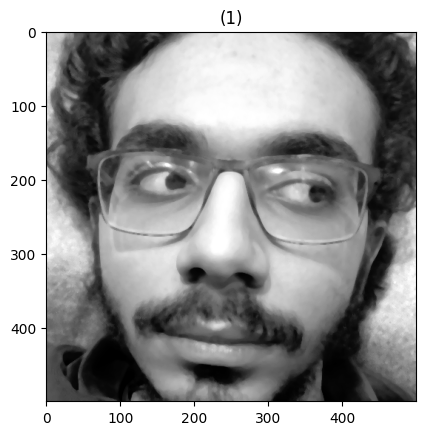

In [5]:
show_images([mssImages[5]])

In [6]:
abdelattyImages = process('../Data/ourDataset/cropped/Abdelatty/',
                    rem_noise=True, gamma_corre=True, hist_eq=True,resize=True,target_size=target_image_size,gamma=0.8)

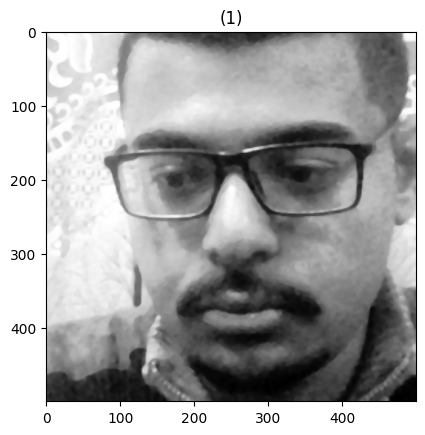

In [7]:
show_images([abdelattyImages[0]])

In [8]:
ismailImages = process('../Data/ourDataset/cropped/Ismail/',
                    rem_noise=True, hist_eq=True,resize=True,target_size=target_image_size)

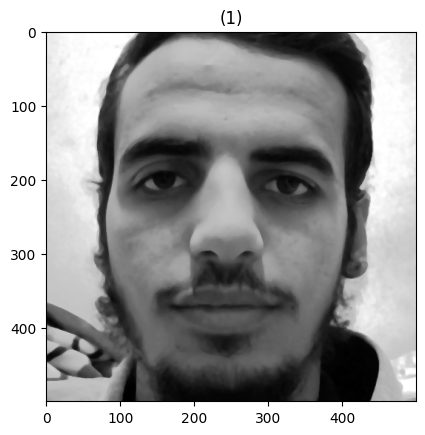

In [9]:
show_images([ismailImages[0]])

In [10]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode="horizontal", seed=42),
    tf.keras.layers.RandomRotation(factor=0.05, seed=42),
    tf.keras.layers.RandomZoom(0.05, seed=42),
])

In [11]:
def getAugmentedList(images):
    copylist=np.copy(images)
    copylist = [tf.expand_dims(im, axis=-1) for im in copylist]
    copyAugmented = data_augmentation(copylist)

    return np.concatenate((copylist, copyAugmented), axis=0)

In [12]:
mssAugmented=getAugmentedList(mssImages)
abdelattyAugmented=getAugmentedList(abdelattyImages)
ismailAugmented=getAugmentedList(ismailImages)


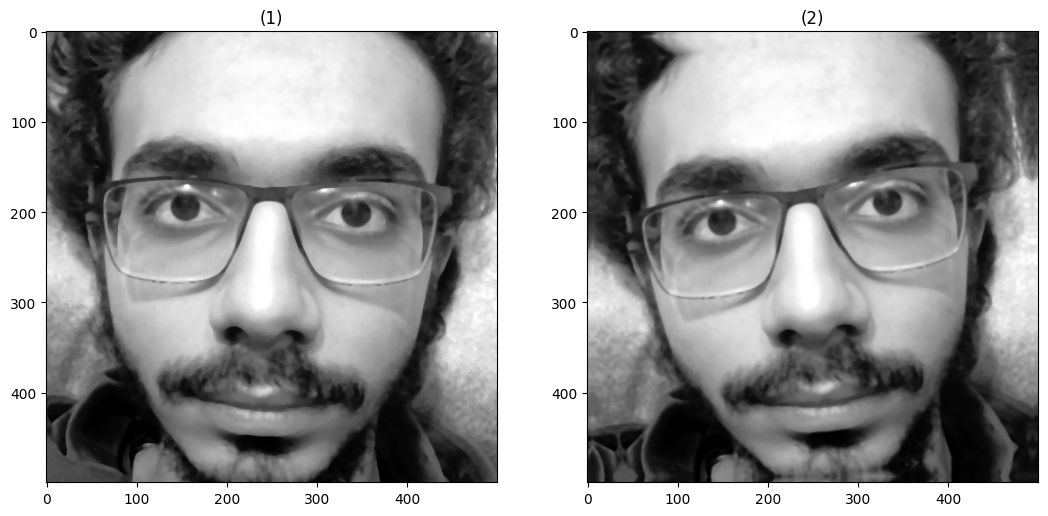

In [13]:
show_images([mssAugmented[0],mssAugmented[42]])

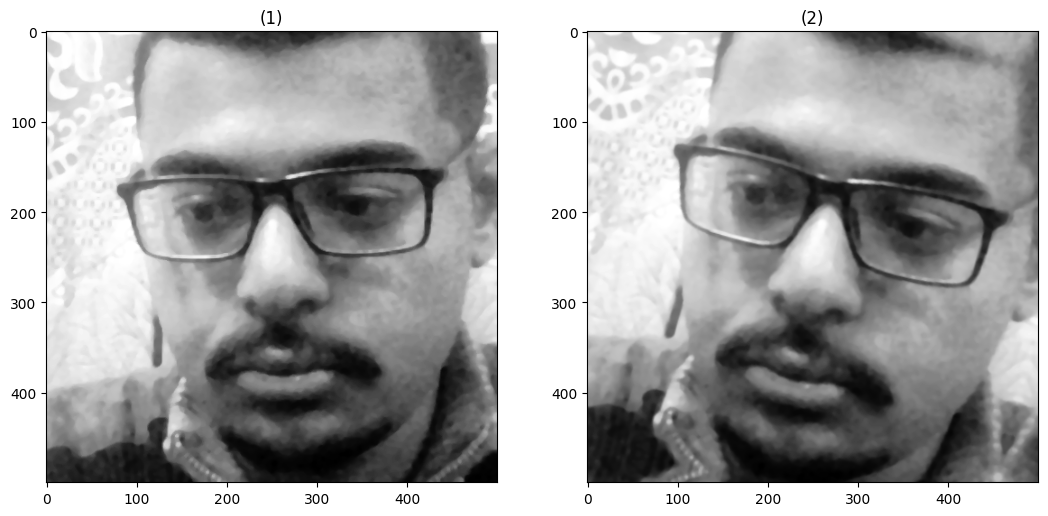

In [14]:
show_images([abdelattyAugmented[0],abdelattyAugmented[52]])


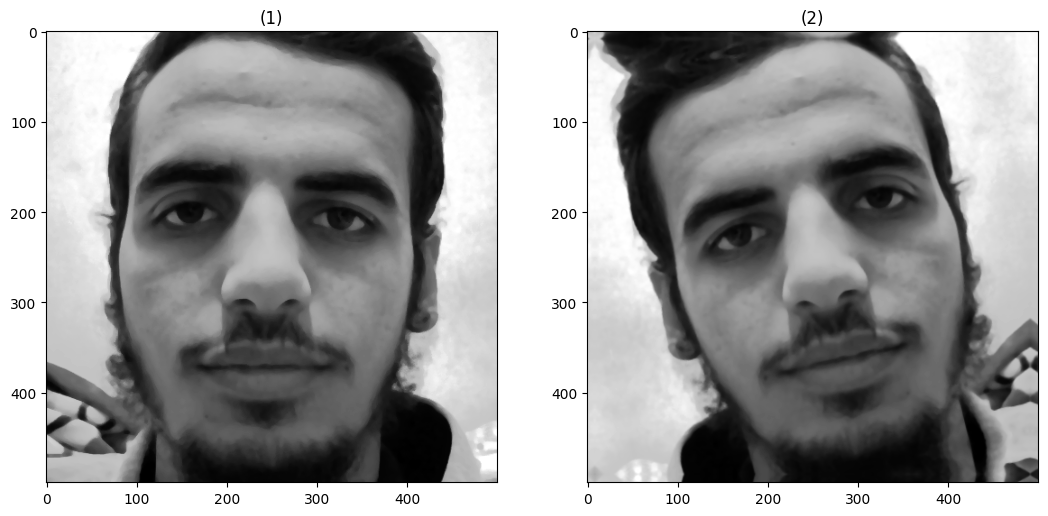

In [15]:
show_images([ismailAugmented[0],ismailAugmented[49]])


In [16]:
hogMss: list[np.ndarray] = get_feature_list_from_paths([im.reshape(500, 500)for im in  mssAugmented])

In [17]:
hogAbdelatty: list[np.ndarray] = get_feature_list_from_paths([im.reshape(500, 500)for im in  abdelattyAugmented])

In [18]:
hogIsmail: list[np.ndarray] = get_feature_list_from_paths(
    [im.reshape(500, 500)for im in ismailAugmented])

In [19]:
hogMss=np.array(hogMss)
hogAbdelatty=np.array(hogAbdelatty)
hogIsmail=np.array(hogIsmail)


In [20]:
final_hog=np.concatenate((hogMss, hogAbdelatty,hogIsmail), axis=0)

In [21]:
final_hog.shape

(286, 3780)

In [22]:
first_value = 0 #samir
second_value = 1 #abdelatty
third_value = 2 #ismail


targets_hog = [first_value] * len(hogMss) + [second_value] * len(hogAbdelatty)+[third_value]*len(hogIsmail)

targets_hog=np.array(targets_hog)

In [23]:
np.save('./numpyArrays/final_hog.npy', final_hog)
np.save('./numpyArrays/targets_hog.npy', targets_hog)

